# Chapter 4: Optimization
Introduction to the Phys212/Biol212 class
### by Ilya Nemenman, 2016-2020

In this Module, we discuss how to *fit* your model parameters to the available experimental data. We do not study specific new Python concepts, but I may add a few sections of the book to read here. 

## Why optimization?
Typically when we build a model, parameters of the model are not known a priori. We may know that bacteria grow according to a simple exponential growth with carrying capacity, but neither the maximum growth rate, nor the capacity itself are usually known. Instead, we need to *fit* these from data. That is, we need to find the parameter values that create the dynamics such that the graphs of solutions of the dynamics match the measured experimental data. Sometimes it may be possible to get the predictions and the data to coincide completely, but this is rare. Indeed, the model itself may not be totally accurate, or, what is even more common, experimental data may come with some measurement noise. Thus we only try to get the modeling curves pass as close as possible to experimental data, but we cannot require that they match perfectly.

Such fitting of models from data is an example of a huge (and forever to remain largely unsolved) field of computational sciences -- namely, the field of **optimization**. The main problem within the field is typically formulated as follows. A *loss function*  ${\mathcal L}$ is given, which depends on a certain set of parameters $\vec{\theta}$. If we are given maybe some addition properties of the loss function (such as that it is smooth) and the expected range of the parameters, we need to find the minimum of the loss function $${\mathcal L}_0={\rm min}_{\vec{\theta}}{\mathcal L}(\vec{\theta})$$ and the the values of the arguments (parameters) that minimize it $$\vec{\theta}_0={\rm arg}\,{\rm min}_{\vec{\theta}}{\mathcal L}(\vec{\theta}).$$ Note that while it is traditional to talk about minimizing the loss function, minimization of ${\mathcal L}$ is equivalent to maximization of  $-{\mathcal L}$; so that the field is referred to more generally as optimization and not as minimization.

While optimization is a common thread in many computational science problems, specifically those involved in fitting models to data, optimization is also all around us. In physics, the state with maximum entropy is the equilibrium state of matter; further, much of physics can be formulated as the nature finding systems' trajectories that optimize the quantity known as action. Focusing on neuroscience, the trajectory that your arm will take in a reaching task can be predicted through optimization of time and applied force. And life itself cannot be understood without focusing on optimization of fitness -- the number of offsprings that reach maturity. In societies, from decisions made by individuals, to policy choices by executives and politician, we keep on trying to optimize expected rates of return on our investments of time, energy, money. It's not surprising maybe then that, since optimization is so broad and can account for so many natural and social phenomena, the most general optimization problems cannot be solved, even in principle.

>### Your turn 4.1
List a few more optimization problems that you see being solved around you, and which have not already been listed above.

In this course we, will provide just a simple survey of various useful optimization methods, specifically as they apply to fitting models to data. But there's much more to learn. You may want to read up on optimization in a canonical texbook __[Numerical Recipes](http://apps.nrbook.com/c/index.html)__ -- look at the chapter on Optimization. However, don't overdo it -- the text book is aimed at beginning graduate students, and so it goes into more details than we will cover in class. Furthermore, the explosion of artificial intelligence approaches all around us can be traced, to a large extent, to new developments in optimization methods when the parameter vector $\vec{\theta}$ becomes extremely large-dimensional (think of millions or billions of dimensions). These problems have revealed totally new directions in optimization research, and have resulted in discovery of new and unexpected phenomena. We will not touch this subject in class, and will instead focus on optimization for cases when $\dim \vec{\theta}$ is either one, or, at most, a few.

### Blind fits: Empirical statistical models
**Statistical models** are models that describe relationships among the data purely phenomenologically, without any reference to the nature (physical, biological, chemical,...) of the mechanisms that generate the dependences. The simplest statistical models result from the fitting procedure that many of you are familiar with from analysis during laboratory science classes, namely the *linear regression*. Here the model of data is not dynamic, but rather static. Specifically, we are interested, in the simplest case, in a functional form of the dependency relation between two variables $x$ and $y$. The simplest such relation that one can postulate is that the variables are linearly dependent, $y=kx$, with an unknown coefficient $k$. Then the linear regression problem amounts to starting with measured pairs $(x_i,y_i)$, $i=1,\dots N$, and the goal is to find $k$ that produces the best fit line, the closest line to the observed points.

**ToDo: <font color=pink>add an illustration </font>**

What do we mean by "the closest"? The distance between the observation, $y_i$, and the fit line, $\hat{y}_i=kx_i$ is $\left|kx_i-y_i\right|$. While other choices are possible, a common choice is to say that the sum of squares (S.O.S.) of distances between the observations and the fit line, 
$${\mathcal L}=\sum_{I=1}^N (kx_i-y_i)^2,$$ 
should be minimized over the parameter $k$. We do this by taking the derivative of ${\mathcal L}$ with respect to $k$, and setting the derivative to zero: 
$$\frac{d{\mathcal L}}{dk}=\sum_{I=1}^Nx_i(kx_i-y_i)=0.$$
This can be transformed to give us the optimal parameter value 
$$k_0=\frac{\sum_{I=1}^Nx_iy_i}{\sum_{I=1}^Nx_i^2}.$$
This example is the simplest case of what is known as **least squares** **linear regression** -- deriving a coefficient that summarizes the linear relationship between the dependent variable $y$ (also known as the regressand or the response variable), and the independent variable $x$ (also known as a regressor, an input, or a predictor variable). The name *least squares* comes from us minimizing (making the least) the S.O.S. loss function, and the name *linear regression* indicates that the relationship between the predictor(s) and the response(s) is approximated by (or regressed to) a line. 

>### Your Turn 4.2
Derive the above expression for the optimal parameter value $k_0$ in the simple uni-variate linear regression model, $k_0=\frac{\sum_{I=1}^Nx_iy_i}{\sum_{I=1}^Nx_i^2}$. Show that this is, indeed, a minimum (but not the maximum) of the loss function ${\cal L}(k)$.

Linear regression methods can be extended to the *multiple* regression case, when there are more than one predictor variables, or to the *multivariate* regression case, when there are more than one correlated response variables. This involves techniques from multivariate calculus and linear algebra, and we won't derive the method here. A special case of such multiple linear regression, which we often encounter in practice, is 
$$y=a+bx+cx^2+dx^3+\dots.$$
Note that even though $y$ is a nonlinear function of $x$, it is a linear function of $a,b,c,d,\dots$, and thus the optimization can be solved by linear regression methods. Here $1,x,x^2,x^3$ act as four different predictors (with the predictor corresponding to $a$ being the same, 1, for every data point). In general, one should remember that linear regression may regress based on a nonlinear predictor!

Regression is the simplest, linear example of optimization. We will start with it, and then move on to more complicated examples. Least squares linear regression methods are not just some of the simplest, but also some of the oldest methods in statistics. They have existed well before statistics itself. The methods trace their emergence to the early 1800s, to Legendre and Gauss, and then to Quételet, who introduced the methods and made them popular in social sciences in the middle of the 19th century. Galton invented the term *regression* in the second half of the 19th century in discussion of the phenomenon that offspring of tall people tend to *regress* down towards a normal height. Finally, as many things in statistics, the final formalization of assumptions that go into the linear regression is due to __[Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher)__ in the early 20th century. As a side note, Fisher is probably the scientist with the largest scientific footprint who is not known to the general public. He is, in many respects, the founder of modern statistics and of population genetics -- not one, but two fields of science! 

## Linear regression in Python
In Python, linear regression is implemented in many different modules, but we will focus on the `linalg.lstsq()` function in the `numpy` module. You should definitely read the __[help page](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.lstsq.html)__ for this function.

Let's do a few examples of regression using this function. First, let's call the `help()` on it, and explore the parameters and the return values. We will not use most of these in this introductory course, but try to understand what they are -- especially if you have taken a Linear Algebra course previously.

In [1]:
#Initialization
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

%matplotlib inline 

help(np.linalg.lstsq)

Help on function lstsq in module numpy.linalg.linalg:

lstsq(a, b, rcond='warn')
    Return the least-squares solution to a linear matrix equation.
    
    Solves the equation `a x = b` by computing a vector `x` that
    minimizes the Euclidean 2-norm `|| b - a x ||^2`.  The equation may
    be under-, well-, or over- determined (i.e., the number of
    linearly independent rows of `a` can be less than, equal to, or
    greater than its number of linearly independent columns).  If `a`
    is square and of full rank, then `x` (but for round-off error) is
    the "exact" solution of the equation.
    
    Parameters
    ----------
    a : (M, N) array_like
        "Coefficient" matrix.
    b : {(M,), (M, K)} array_like
        Ordinate or "dependent variable" values. If `b` is two-dimensional,
        the least-squares solution is calculated for each of the `K` columns
        of `b`.
    rcond : float, optional
        Cut-off ratio for small singular values of `a`.
        For the pur

We will now explore how linear regression (even with nonlinear predictors!) works. We start with defining some synthetic data.

In [2]:
x = np.arange(10) #creating the independent variable, array from 0 to 9
y = np.array([-1, 0.2, 0.9, 2.1, 3.0, 3.9, 4.5, 4.9, 5.3, 6.1]) # values of the dependent variable

We will try to fit multiple models: $y=a + bx$, $y=a+bx+cx^2$, and $y=a+bx+cx^4$. This requires us to create a matrix of the predictor variables, where the columns are $1,x,x^2,\dots$, and the rows are the specific simultaneous instances of these variables.

In [3]:
A1 = np.vstack([np.ones(len(x)), x]).T        # argument for regression #1: y= a + bx
A2 = np.vstack([np.ones(len(x)), x, x**2]).T  # argument for regression #2: y = a + bx + cx**2
A4 = np.vstack([np.ones(len(x)), x, x**2, x**3, x**4]).T  #argument for regression #3: y = a + bx + cx**2 + dx**3 +Ex**4

In the definition of the arguments above, pay attention to `.T`. Since, as mentioned, `lstsq()` function takes different predictor variables in columns, where each row corresponds to an instance, we first generate predictors in rows, and then transpose to form the data matrix. Now we perform the linear regressions for different combinations of powers of `x`.

In [4]:
a1, b1 = np.linalg.lstsq(A1, y, rcond=None)[0]             # regression 1
a2, b2, c2 = np.linalg.lstsq(A2, y, rcond=None)[0]         # regression 2
a4, b4, c4, d4, e4 = np.linalg.lstsq(A4, y, rcond=None)[0] # regression 3

Notice how we use the `[0]`'th return values of the `lstsq()` function above. This is the part of the return that contains the optimal values of the coefficients. We do not use the other return values.

>### Your turn 4.3
What is in the other return values? Explain in your own words and demonstrate wherever possible.

Now let's plot the results of the regressions.

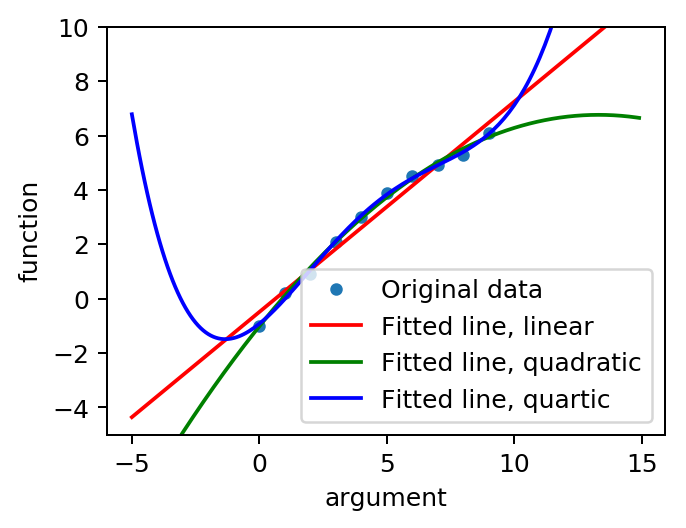

In [5]:
# Make a large figure, as always.
fig, ax = plt.subplots(figsize=(4, 3), dpi= 180, facecolor='w', edgecolor='k')

plt.plot(x, y, 'o', label='Original data', markersize=4) # plotting the original data.
# Notice that we would like to explore etrapolation outside of the range x=[0,9].
# Thus we use x between -5 and 15.
xx = np.arange(-5, 15, .1) 

# Now plot the 3 linear regression fits.
plt.plot(xx, a1+b1*xx, 'r', label='Fitted line, linear') # plotting regression 1 curve 
plt.plot(xx, a2+b2*xx+c2*xx**2, 'g', label='Fitted line, quadratic') # plotting regression 2 curve 
plt.plot(xx, a4+b4*xx+c4*xx**2+d4*xx**3+e4*xx**4, 'b', label='Fitted line, quartic') # plotting regression 3 curve 
plt.xlabel('argument')
plt.ylabel('function')
plt.ylim((-5, +10.0))      # Change the range of the y axis for better visualization
plt.legend(loc=4)          # Put the legend in the 4th corner (bottom right)
plt.show()

>### Your turn 4.4
Which corner does the `legend()` argument `loc=2` corresponds do? Demonstrate by running the appropriate command.

Which of the fitted lines would you believe for the fits themselves? For extrapolation? I would argue that the straight line is, what is called, **underfitted** -- it does not go close enough to the data points. The fourth order line is **overfitted**: a complex model (usually, but not always, complexity means many parameters) often can fit the data almost perfectly, but these are not honest fits: they result in bad *extrapolation* and generalization (and sometimes even bad *interpolation*) There are ways of choosing the right complexity of the model systematically, but this is outside the scope of this course. Here the second order model is in the Goldilocks zone -- it fits the data well enough, but does not overfit and provides good generalization. Without a systematic analysis, how do we know that this is a goldilocks fit? Notice that the residuals for the red line  have a pattern.


Just in case you are unfamiliar with the concepts from the above, let's define them. **Generalization** in statistics (and aritifical intelligence) is an ability of an algorithm to be effective and make correct predictions across a range of inputs and applications, including those that were not present in the fitted dataset. **Interpolation** is a type of generalization, where predictions about certain features of the data are made within the range of the data points used for the fitting. Conversely, **extrapolation** is a type of generalization, where predictions about the data features are made outside of the range of the data points used for the fitting. 

The example above illustrates the problem with blind, statistical models: they are often (but not always) good for *interpolation*, but are almost always not good for *extrapolation* far beyond the data you are building your model on. A **physical** or a **mechanistic** model, which correctly captures the underlying physical reason for the statistical dependency usually does much better in extrapolation, as we will see later on.


>### Your turn 4.5
Look up the predicted maximum temperature for the next ten days online and build a linear regression model of what the temperature will be on day 11 using zeroth order, linear, quadratic, and cubic polynomial model (where the order is defined as a power of time, in days). Which of the models, if any, of the ones that you built do you believe more? Why? Note that there will be changes to the code that you will need to do for the zeroth order model to work due to Python idiosyncrasies. 

This exercise (hopefully) will again illustrate the failure of purely statistical models to extrapolate.

## Nonlinear optimization
Before we can proceed to fitting parameters of physical models, we need to talk a bit about the general properties of nonlinear optimization -- that is, optimization where the model is not linear in the parameters being learned, and hence the loss function ${\cal L}$ is not quadratic in these parameters.


### Nonlinear optimization is hard!
While a lot more can be added here (see the appropriate section of the Numerical Recipes book), it suffices to say that optimization is hard. And the more dimensional the optimization problem is, the harder it is, generally. Overall, this in because 
 - In large dimensions, the volume of the parameter space grows quickly. If one needs to find the minimum to the accuracy $\Delta x$, and the typical size of the system along each dimension is $L$, then there are $(L/\Delta x)^d$ spaces to explore in $d$ dimensions, which very quickly becomes hard even for relatively small $d$. This remains true for the linear optimization as well, but has no effect on the difficulty of optimization then because the next complications are not present for linear problems.
 - There's usually just one global minimum, but many local minima that we are not interested in. The optimizers get stuck in the local minima and can't escape them to find the global ones. This is more likely in large dimensional problems. For linear probelms, the loss function ${\cal L}$ is quadratic in the parameters, which means that there's just one minimum, and no local minima.
 - There are also regions of space where the loss function ${\cal L}$ is nearly flat, so that the optimizer does not know which way to go towards the minimum. Again, this is more likely in higher dimensions. As above, because of the quadratic nature of ${\cal L}$ for linear problems, there are no such flat regions in linear problems. 
 - In higher dimensional nonlinear optimization, there are a lot of other exotic situations, such as valleys, narrow canyons, funnels, discontinuous walls -- and all those make optimization harder.
There are some exceptions -- problems like the multiple linear regression we discussed below -- that are known as *convex*, which means that there's just one minimum (global or local), and there are no flat regions, and so one can easily find the minimum. Nonetheless, even in non-convex problems, one often can find at least a local minimum by simply following the gradient, and sliding downhill. We will explore this in the later lectures.

### General structure of optimizers
Quite generally, optimizers -- that is, methods for finding optimal parameters of a loss function -- are divided along the following characteristics:
 - Number of derivatives required (none, first derivatives -- gradient, or second derivatives -- which allows one to deal with flat regions). 
 - Deterministic vs stochastic. Here, as always, deterministic methods always produce the same solution, while stochastic ones may produce different solutions in different runs.
 
 
### 1-d optimization
1-d optimization is special. While for larger-dimensional problems finding a minimum is never guaranteed, in 1-d we are guaranteed to find a minimum if we bracketed it (that is, know the value of the function in three points, and the value is higher for the two exterior points than the interior one). We will then subdivide the interval again and again, always making sure to keep bracketing the minimum, until the minimum is eventually localized to the desired accuracy. This can be done with the golden section 1-d search. Let's try to derive this method.

#### Golden Section search
Suppose we are trying to minimize a 1-d function ${\cal L}(\theta)$, and we know the values of ${\cal L}$ at three points, $\theta_1<\theta_2<\theta_3$ such that ${\cal L}(\theta_2)<\min [{\cal L}(\theta_1), {\cal L}(\theta_3)]$. Then there's at least one minimum of the loss function in the range $(\theta_1, \theta_3)$. In other words, the minimum is bracketed within this range.

>### Your turn 4.6
Does the statment that there is a minimum between $\theta_1$ and $\theta_3$ if $\theta_1<\theta_2<\theta_3$, while  ${\cal L}(\theta_2)<\min [{\cal L}(\theta_1), {\cal L}(\theta_3)]$ assume anything about ${\cal L}$? If yes, then what? Explain.

We can now subdivide the bracketing interval $(\theta_1,\theta_3)$ by choosing a point $\theta_4$ somewhere within it. We then look for a smaller range, bracketed by one of the edges, and ether $\theta_2$ or $\theta_4$, with the other one of these two internal points being below the two new edges.  Let's suppose, for concreteness, that we choose $\theta_2<\theta_4<\theta_3$. Where exactly should we choose $\theta_4$? Let's suppose that $\theta_2$ divided the orginal range $(\theta_1,\theta_3)$ into two segements with the ratio of lenghts $w=\frac{\theta_2-\theta_1}{\theta_3-\theta_1}$, and $1-w = \frac{\theta_3-\theta_2}{\theta_3-\theta_1}$. Now let's suppose that $\theta_4$ added an additional fraction $z$ to the segment $z=\frac{\theta_4-\theta_2}{\theta_3-\theta_1}$. When we are choosing the new bracket, it will be either $(\theta_1,\theta_4)$, which has the length ratio $w+z$ or $(\theta_2,\theta_3)$, which has the length ratio $1-w$. To choose the $z$, we want to minimize *the worst case* outcome, which we achieve by requesting that these two possibilities result in the same size segments $w+z=1-w$, or, in other words $z=1-2w$. This immediately implies that the new point $\theta_4$ must be on the largest of the two intervals $(\theta_1,\theta_2)$ or $(\theta_2,\theta_3)$.

But where did $w$ itself come from? Presumably, it was the result of applying the same rule to subdivide the previous segment. This implies that $z$ should be the same fraction of $1-w$ as $w$ was of 1, that is $\frac{z}{1-w}=w$, or $z=w(1-w)$. Now plugging into this $z=1-2w$, we get $1-2w=w-w^2$, or
$$w^2 -3w-1=0$$.
This is a quadratic equation for what's known as the *golden mean*: dividing a rectangle in such a way that the ratio of the area of the largest part to the whole is the same as the smallest to the largest. This problem was solved first by the ancient Greeks! 
$$w=\frac{3-\sqrt{5}}{2}\approx0.38197.$$

A simple implementation of the golden section algorithm for finding a minimum is shown below.

<font color=pink>**ToDo: add figure**</font>

In [6]:
## function to be added ToDo

The golden section method only exists in 1d -- there's no equivalent method in higher dimensions.

>### Your turn 4.7
Explain why a minimum cannot be bracketed in higher dimensions, and hence an equivalent of the golden section algorithm does not exist. Give examples of functions to demoinstrate your arguments.

#### Parabolic interpolation (Brent's method) in 1-d
There are other methods that generalize from 1-d to higher dimensions, under various assumptions. Their general structure is to use the fact that most nice functions have a quadratic, parabolic shape near their minimum. With that assumption, the minimum can be found very quickly, and even without the bracketing.

For example, the **parabolic interpolation** estimates the parabola that passes through three points $\theta_1,\theta_2,\theta_3$, with the values ${\cal L}(\theta_1)$, ${\cal L}(\theta_2)$, ${\cal L}(\theta_3)$. And in this case, we do not even need the bracketing! Having found the parabola, we then find its minimum, step towards it, and repeat the procedure from the three new lowest points. Let's formalize this. 

Let's suppose that the parabola is ${\cal L}=a\theta^2+b\theta+c$. This gives us three equations for the three unknown coefficient:
\begin{eqnarray}
{\cal L}(\theta_1) = a\theta_1^2+b\theta_1+c,\\
{\cal L}(\theta_2) = a\theta_2^2+b\theta_2+c,\\
{\cal L}(\theta_3) = a\theta_3^2+b\theta_3+c.\\
\end{eqnarray}
This is a system of three *linear* equations in $a,b,c$, which allows them to found easily. The only exception is when the three points are collinear, which one needs to be careful about.

<font color=pink>**ToDo: add figure**</font>

>### Your turn 4.8
Find $a,b,c$ for fitting a parabola through three points. This will require some algebra on your part. Then find the minimum of the parabola and write a function that implements the parabolic approximation algorithm. Use it to find the minimum of ${\cal L}(\theta)= -\frac{1}{\theta^2+a^2}$, where $a$ is some constant. In your code, do not bother to check if the three points, on which the parabola is being built, are not collinear, but keep in mind that such check would be needed in a more general situation.

#### Newton's method for optimization
Another method that generalizes to higher dimensions -- but now requires knowing a lot about ${\cal L}(\theta)$ is the Newton's method. It starts by noting that the minimum corresponds to the zero of the derivative of a function, one can solve for the zero of the derivative similarly to how we did this for the Newton-Raphson method. Note that this method needs knowing not just the first, but also the second derivative of ${\cal L}$!

>### Your turn 4.9
Implement the Newton's method for optimization by changing the code you used for the Newton-Raphson solver. Use it to find the minimum of ${\cal L}(\theta)= -\frac{1}{\theta^2+a^2}$, where $a$ is some constant.


### Maximum accuracy of optimization
What is the maximum precision that we should request of an optimizer looking for the optimal point? Remember that floating point numbers at double precision are stored in the memory to the relative error of $\epsilon \approx 10^{-16}$. Also recall that most functions of a single argument behaver near an optimum like 
$${\cal L}(\theta)\approx \frac{1}{2}\left.\frac{\partial^2 {\cal L}}{\partial \theta^2}\right|_{{\theta}_0}(\theta-{\theta}_0)^2.$$ 
To find the position of a minimum of a function, we must be able to compare the function values to each other near the minimum: indeed, we need to know, which of the function values is smaller than the others. However, comparisons of floating point numbers are never perfect, and can only be performed up to a certain relative precision. That is, we can only know that ${\cal L}(\theta_0+\Delta \theta)$ is greater than ${\cal L}(\theta_0)$ (and hence $\theta_0$ is the position of the minimum) if the different between the two values of ${\cal L}$ can be measured:
$$\left| {\cal L}(\theta_0+\Delta \theta) - {\cal L}(\theta_0)\right|\ge \epsilon {\cal L}(\theta_0)$$
Now using the quadratic expansion for ${\cal L}$ near the minimum, we get:
$$\left| \frac{1}{2}\frac{\partial^2 {\cal L}}{\partial \theta^2}\right|_{\theta_0}(\theta-\theta_0)^2\ge \epsilon{\cal L}(\theta_0).$$
After simple algebra, this gives:
$$\theta-\theta_0 \ge \sqrt{\frac{2\epsilon{\cal L}(\theta_0)}{\left|\frac{\partial^2 {\cal L}}{\partial \theta^2}\right|_{\theta_0}}}.$$
This sets the limit of the maximum accuracy one can expect from *any* optimizer of a function that is quadratic near a minimum. For typical values of ${\cal L}\sim O(1)$, and  $\frac{\partial^2 {\cal L}}{\partial \theta^2}\sim O(1)$, we see that the maximum accuracy is about:
$$\theta-\theta_0 \ge 10^{-8}.$$
This also tells us what we should do not to loose the optimization accuracy: having ${\cal L}(\theta_0)$ as close as possible to zero, improves it.

**ToDo: <font color=pink>finish the section.</font>**





>### Your turn
Write down a parabolic interpolation or Newton method minimizer of 1-d functions. Minimize a  $\cosh x$ using your minimizer. Do you get the expected result?

## Fitting parameters of physical models 
Here we will explore how to fit models that are more than simple formulas, but are results of solving differential equations. We will also work a lot on figuring out how to avoid blind fitting, and fit like scientists who understand where the data comes from.

### Definining functions to be fitted
Our model is that of the Michaelis-Menten enzyme, where the substrate concentration depends on time as $$\frac{dx}{dt}=-\frac{Vx}{K+x},$$ where $V$ is the maximum catalytic velocity of the enzyme, and $K$ is the Michaelis constant: when $x\gg K$, the enzyme saturates and slows down, such that it slows down by a factor of 2 at $x=K$. We will generate synethic data from this equation with somespecific aprameter values $V=3.3$ and $K=3.0$, and then try to fit this data and get the values of the parameters back from the fit. Multiple different functions will be needed to perform the optimization and will be explored here.

The first function is simply a Michaelis-Menten rate, which takes the current substrate concentration and the two constants defining an enzyme (V and K), and outputs the current value of the rate of change of the substrate.

The second function takes the Michaelis-Menten rate and integrates it over time, producing a trajectory for the substrate dynamics. 

In [7]:
from scipy.optimize import curve_fit # note a new module


#Michaelis-Menten rate equation function; to be used for integrating numerically the MM equation described above.
def MichaelisMenten(x, t, V, K):
    # Inputs:
    #   x -- current substrate concentration
    #   t -- current time; unused but required for the integrators to work 
    return -V*x/(K+x)

#Michaelis-Menten trajectory
def MMTrajectory(t, V, K):
    return odeint(MichaelisMenten, init_conc, t, args=(V, K)).flatten()

Now we need to verify that the functions we wrote above are correct. Note that the Michaelis-Menten rate, for small $x$ should go as $-Vx/K$, so that it is linear with $x$ with the slope of $-V/K$. At the same time, when $x\gg K$, the Michaelis rate is $-V$. So to verify the two functions, we plot the rate for, say $V=5, K=2$. 

### Generating simulated experimental data
We now use the Michaelis-Menten functions defined above to generate the synthetic data that we will eventually fit.

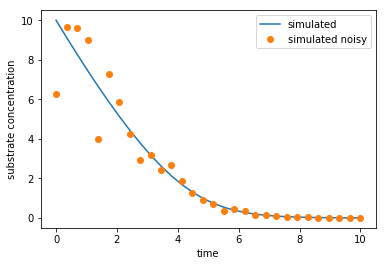

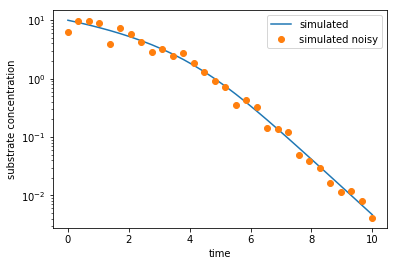

In [8]:
init_conc = 10.0     # initial concentration
t = np.linspace(0, 10, 30).flatten()  # time points 
x = odeint(MichaelisMenten, init_conc, t, args=(3.3, 3.0)).flatten()  # true MM trajectory with arguments 3.3 and 3.0
data = (1+0.2*np.random.randn(x.size))*x # trajectory with additional relative noise of 20%
plt.plot(t, x, label='simulated')
plt.plot(t, data, 'o', label='simulated noisy')
plt.xlabel('time')
plt.ylabel('substrate concentration')
plt.legend()
plt.show() 
# note the initial linear decrease in the substrate concentration

plt.semilogy(t, x, label='simulated')
plt.semilogy(t, data, 'o', label='simulated noisy')
plt.xlabel('time')
plt.ylabel('substrate concentration')
plt.legend()
plt.show()
# note the exponential (linear in the semi-log plot) decrease of the substrate concentration at longer times

### Fiding a good guess for V using a linear fit for the first part of the curve

In [9]:
first_range = 11
A = t[0:first_range]
A = A.reshape((A.size, 1))
y = data[0:first_range]-init_conc
y = y.reshape((y.size, 1))

a = float(np.linalg.lstsq(A, y, rcond=None)[0])
v_guess = -a
print('Estimated V=' + str(v_guess))

Estimated V=2.263500625604731


### Fiding a good guess for K using a linear fit for the log-transformed data in the second range of the curve (equivalently, exponential fit to the tail of the data)

In [10]:
second_range = 15
A = t[second_range:]
A = np.vstack([np.ones(A.size), A]).T
y = np.log(data[second_range:])

a, b = np.linalg.lstsq(A, y, rcond=None)[0]
k_guess = -v_guess/b

print('Estimated K=' + str(k_guess))

Estimated K=2.160322739989388


### Fitting the MM equation to the data and finding the parameters 

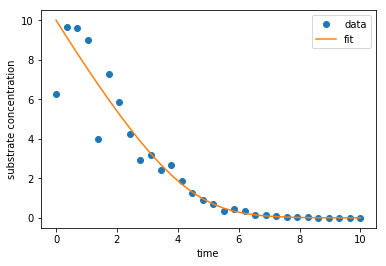

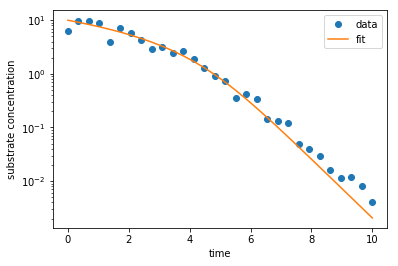

Fitted V=3.0310431686912804
Fitted K=2.3927109127830217


In [11]:
v, k = curve_fit(MMTrajectory, t, data, p0=(v_guess, k_guess))[0]

plt.plot(t, data, 'o', label='data')
plt.plot(t, MMTrajectory(t, v, k), label='fit')
plt.legend()
plt.xlabel('time')
plt.ylabel('substrate concentration')
plt.show()

plt.semilogy(t, data, 'o', label='data')
plt.semilogy(t, MMTrajectory(t, v, k), label='fit')
plt.legend()
plt.xlabel('time')
plt.ylabel('substrate concentration')
plt.show()
# Note how the fitted curve deviates from data at large times
# This deviation is manifested in quite a large relative error in estimation of V and K

print('Fitted V=' + str(v))
print('Fitted K=' + str(k))

### Fitting the MM equation to the log-transformed data and finding the parameters 


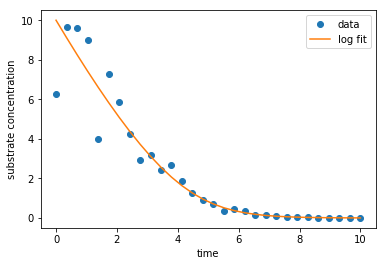

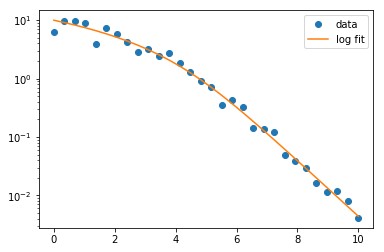

Log-fitted V=3.362116138470254
Log-fitted K=3.0574248267003044


In [12]:
#logarithm of the Michaelis-Menten trajectory
def logMMTrajectory(t, V, K):
    return np.log(odeint(MichaelisMenten, init_conc, t, args=(V, K)).flatten())

vl, kl = curve_fit(logMMTrajectory, t, np.log(data), p0=(v_guess, k_guess))[0]

plt.plot(t, data, 'o', label='data')
plt.plot(t, MMTrajectory(t, vl, kl), label='log fit')
plt.legend()
plt.xlabel('time')
plt.ylabel('substrate concentration')
plt.show()

plt.semilogy(t, data, 'o', label='data')
plt.semilogy(t, MMTrajectory(t, vl, kl), label='log fit')
plt.legend()
plt.show()
# Note a much smaller deviation of the fitted curve from data at large times
# This smaller deviation is manifested in a smaller relative error in estimation of V and K

print('Log-fitted V=' + str(vl))
print('Log-fitted K=' + str(kl))